# 6주차
## # 경찰청_연도별 사이버 범죄 통계 현황.csv
- 연도별 사이버 범죄 세부 유형별 발생, 검거 통계
- 2014년도부터 2020년도 자료
- 해킹, 서비스거부, 악성프로그램, 인터넷사기, 사이버금융범죄 등

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
crime = pd.read_csv('C:/Users/sj123/Downloads/경찰청_연도별 사이버 범죄 통계.csv')
crime.shape

(14, 35)

In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   연도                14 non-null     int64  
 1   구분                14 non-null     object 
 2   해킹(계정도용)          14 non-null     int64  
 3   해킹(단순침입)          14 non-null     int64  
 4   해킹(자료유출)          14 non-null     int64  
 5   해킹(자료훼손)          14 non-null     int64  
 6   서비스거부공격           14 non-null     int64  
 7   악성프로그램(랜섬웨어)      14 non-null     int64  
 8   악성프로그램(기타)        14 non-null     int64  
 9   기타 정보통신망 침해형 범죄   14 non-null     int64  
 10  사이버사기(직거래)        14 non-null     int64  
 11  사이버사기(쇼핑몰)        14 non-null     int64  
 12  사이버사기(게임)         14 non-null     int64  
 13  사이버사기(이메일 무역사기)   14 non-null     int64  
 14  사이버사기(기타)         14 non-null     int64  
 15  사이버금융범죄(피싱)       14 non-null     int64  
 16  사이버금융범죄(파밍)       14 non-null     int64  
 17 

In [5]:
crime.head(2)

,연도,구분,해킹(계정도용),해킹(단순침입),해킹(자료유출),해킹(자료훼손),서비스거부공격,악성프로그램(랜섬웨어),악성프로그램(기타),기타 정보통신망 침해형 범죄,...,사이버 음란물(일반음란물),사이버 음란물(아동음란물),사이버 음란물(불법촬영물유포),사이버 도박(스포츠토토),사이버 도박(경마 경륜 경정),사이버 도박(카지노),사이버 도박(기타),사이버 명예훼손(모욕),사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,145,974,...,1366,2623,842.0,3222,332,429,1709,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,81,272,...,987,2398,678.0,3154,315,382,1585,12638,39,126


## # 칼럼명 변경하기

In [6]:
def column_name(col):
    if '(' in col and ')' in col: # 문자열 col 안에 '(' 와 ')' 가 모두 포함되어 있다
        return col[col.find('(')+1:col.find(')')].strip() # +1 : 괄호 제외 괄호 안 첫 글자부터 시작해서 괄호까지 슬라이싱
    else:
        return col.strip() # 괄호 없을 때 그냥 컬럼 전체를 리턴 (앞뒤 공백만 제거)
crime.columns = [column_name(col) for col in crime.columns]

etc = [col for col in crime.columns if col == '기타']
crime['기타'] = crime[etc].sum(axis=1)
crime.drop(columns=etc, inplace=True)

crime.columns

Index(['연도', '구분', '계정도용', '단순침입', '자료유출', '자료훼손', '서비스거부공격', '랜섬웨어',
       '기타 정보통신망 침해형 범죄', '직거래', '쇼핑몰', '게임', '이메일 무역사기', '피싱', '파밍', '스미싱',
       '메모리해킹', '몸캠피싱', '메신저이용사기', '개인위치정보 침해', '사이버저작권침해', '기타 정보통신망 이용형 범죄',
       '일반음란물', '아동음란물', '불법촬영물유포', '스포츠토토', '경마 경륜 경정', '카지노', '모욕',
       '사이버 스토킹', '기타 불법 컨텐츠'],
      dtype='object')

In [7]:
crime.head(3)

,연도,구분,계정도용,단순침입,자료유출,자료훼손,서비스거부공격,랜섬웨어,기타 정보통신망 침해형 범죄,직거래,...,기타 정보통신망 이용형 범죄,일반음란물,아동음란물,불법촬영물유포,스포츠토토,경마 경륜 경정,카지노,모욕,사이버 스토킹,기타 불법 컨텐츠
0,2020,발생건수,1067,1621,130,358,25,24,974,123168,...,2594,1366,2623,842.0,3222,332,429,19388,42,204
1,2020,검거건수,117,217,46,168,10,0,272,93690,...,1254,987,2398,678.0,3154,315,382,12638,39,126
2,2019,발생건수,751,1458,114,341,35,24,669,89797,...,2559,1769,756,165.0,3078,366,366,16633,25,251


## # 인터넷_이용자.csv
- 2014년도부터 2020년도 시계열 기반 인터넷 사용자 통계 (연령별/성별 등 포함)
- 해킹, 서비스거부, 악성프로그램, 인터넷사기, 사이버금융범죄 등
- 만 3세 이상 인구 기준
- 2015년 조사부터 연령구분을 3-9세, 10대, 20대, 30대, 40대, 50대, 60대, 70세 이상으로 구분함로 구분함

In [8]:
internet = pd.read_csv("C:/Users/sj123/데이터분석/산업공학실험/data/인터넷_이용자수.csv")
internet

,시점,전체,성별,성별.1,연령별,연령별.1,연령별.2,연령별.3,연령별.4,연령별.5,...,지역별.3,지역별.4,지역별.5,지역별.6,지역별.7,지역별.8,지역별.9,지역별.10,지역별.11,지역별.12
0,시점,소계,남성,여성,3-9세,10대,20대,30대,40대,50대,...,인천,광주,대전,울산,경기,강원,충청,전라,경상,제주
1,2020,46819,23989,22830,2959,4730,6968,7199,8274,8567,...,2655,1347,1390,1073,12159,1205,3864,3040,5389,586
2,2019,46353,23733,22621,2826,5004,6974,7388,8348,8486,...,2680,1335,1396,1046,11759,1264,3878,2968,5365,570
3,2018,46125,23708,22417,2781,5071,6945,7439,8484,8363,...,2625,1382,1402,1082,11564,1251,3675,3109,5396,562
4,2017,45283,23315,21968,2694,5237,6897,7555,8577,8298,...,2534,1375,1370,1098,11250,1237,3480,3066,5304,535
5,2016,43636,22451,21185,2670,5401,6841,7517,8352,7802,...,2496,1346,1350,1076,10779,1103,3262,2898,5147,498
6,2015,41940,21755,20185,2555,5647,6796,7633,8360,7245,...,2403,1328,1272,1062,10359,1091,2881,2668,4979,490
7,2014,41118,21469,19649,2526,5903,6780,7780,8324,6863,...,2279,1303,1264,1011,10064,1053,2803,2578,4892,454


In [9]:
internet.columns

Index(['시점', '전체', '성별', '성별.1', '연령별', '연령별.1', '연령별.2', '연령별.3', '연령별.4',
       '연령별.5', '연령별.6', '연령별.7', '연령별.8', '지역별', '지역별.1', '지역별.2', '지역별.3',
       '지역별.4', '지역별.5', '지역별.6', '지역별.7', '지역별.8', '지역별.9', '지역별.10',
       '지역별.11', '지역별.12'],
      dtype='object')

In [10]:
# 1. 첫 번째 행을 컬럼명으로 지정
internet.columns = internet.iloc[0]

# 2. 첫 번째 행(헤더였던 부분) 삭제
internet = internet.drop(index=0).reset_index(drop=True)

# 시점 정수화 : 시계열 분석용 정수화
internet['시점'] = internet['시점'].astype(int)

In [11]:
internet.columns = [
    '연도', '전체',
    '남성', '여성',
    '3-9세', '10대', '20대', '30대', '40대', '50대', '60대', '60세 이상', '70세 이상',
    '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기',
    '강원', '충청', '전라', '경상', '제주'
]

In [12]:
internet.head(2)

,연도,전체,남성,여성,3-9세,10대,20대,30대,40대,50대,...,인천,광주,대전,울산,경기,강원,충청,전라,경상,제주
0,2020,46819,23989,22830,2959,4730,6968,7199,8274,8567,...,2655,1347,1390,1073,12159,1205,3864,3040,5389,586
1,2019,46353,23733,22621,2826,5004,6974,7388,8348,8486,...,2680,1335,1396,1046,11759,1264,3878,2968,5365,570


In [13]:
internet

,연도,전체,남성,여성,3-9세,10대,20대,30대,40대,50대,...,인천,광주,대전,울산,경기,강원,충청,전라,경상,제주
0,2020,46819,23989,22830,2959,4730,6968,7199,8274,8567,...,2655,1347,1390,1073,12159,1205,3864,3040,5389,586
1,2019,46353,23733,22621,2826,5004,6974,7388,8348,8486,...,2680,1335,1396,1046,11759,1264,3878,2968,5365,570
2,2018,46125,23708,22417,2781,5071,6945,7439,8484,8363,...,2625,1382,1402,1082,11564,1251,3675,3109,5396,562
3,2017,45283,23315,21968,2694,5237,6897,7555,8577,8298,...,2534,1375,1370,1098,11250,1237,3480,3066,5304,535
4,2016,43636,22451,21185,2670,5401,6841,7517,8352,7802,...,2496,1346,1350,1076,10779,1103,3262,2898,5147,498
5,2015,41940,21755,20185,2555,5647,6796,7633,8360,7245,...,2403,1328,1272,1062,10359,1091,2881,2668,4979,490
6,2014,41118,21469,19649,2526,5903,6780,7780,8324,6863,...,2279,1303,1264,1011,10064,1053,2803,2578,4892,454


# 연도별 인터넷 이용자수 vs 사이버범죄 발생 상관관계 분석
- 전체 사용자수와 사이버 범죄 발생 간 상관관계 확인
- merge → corr() → regplot()

In [14]:
# 사이버 범죄중 발생건수만 빼고 총합구하기
crime_total = crime[crime['구분'] == '발생건수'].copy()
crime_total['사이버범죄 발생건수 총합'] = crime_total.iloc[:, 2:].sum(axis=1)
crime_total = crime_total[['연도', '사이버범죄 발생건수 총합']].copy()

# 인터넷 이용자수 전체 컬럼
internet_total = internet[['연도', '전체']].copy()
internet_total.columns = ['연도', '인터넷 이용자수 총합']

compare = pd.merge(internet_total, crime_total, on='연도')
compare = compare.sort_values(by='연도')
display(compare)

,연도,인터넷 이용자수 총합,사이버범죄 발생건수 총합
6,2014,41118,99590.0
5,2015,41940,132141.0
4,2016,43636,131368.0
3,2017,45283,111307.0
2,2018,46125,119283.0
1,2019,46353,138567.0
0,2020,46819,189451.0


In [15]:
correlation = compare[['인터넷 이용자수 총합', '사이버범죄 발생건수 총합']].corr()
print(correlation)

               사이버범죄 발생건수 총합
사이버범죄 발생건수 총합            1.0


C:\Users\sj123\AppData\Local\Temp\ipykernel_3896\1548072606.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = compare[['인터넷 이용자수 총합', '사이버범죄 발생건수 총합']].corr()


In [16]:
# FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated.
print(compare.dtypes)
# corr()는 숫자형 컬럼끼리만 계산 가능
# 숫자형 칼럼으로 바꿔줘야 함

연도                 int32
인터넷 이용자수 총합       object
사이버범죄 발생건수 총합    float64
dtype: object


In [17]:
compare['인터넷 이용자수 총합'] = pd.to_numeric(compare['인터넷 이용자수 총합'], errors='coerce')

correlation = compare[['인터넷 이용자수 총합', '사이버범죄 발생건수 총합']].corr()
print(correlation)

               인터넷 이용자수 총합  사이버범죄 발생건수 총합
인터넷 이용자수 총합       1.000000       0.557101
사이버범죄 발생건수 총합     0.557101       1.000000


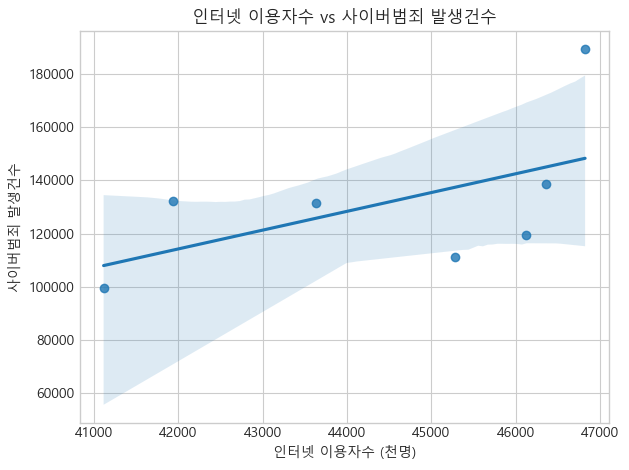

In [18]:
sns.regplot(x='인터넷 이용자수 총합', y='사이버범죄 발생건수 총합', data=compare)
plt.title('인터넷 이용자수 vs 사이버범죄 발생건수')
plt.xlabel('인터넷 이용자수 (천명)')
plt.ylabel('사이버범죄 발생건수')
plt.grid(True)
plt.tight_layout()
plt.show()

전체 인터넷 이용자수와 사이버 범죄 발생건수 간의 상관계수는 약 0.56으로, 중간 정도의 양의 상관관계가 관찰됨
이는 인터넷 보급 증가가 사이버 범죄 발생과 일정 부분 연관되어 있음을 알 수 있음

In [19]:
smartphone = pd.read_csv("C:/Users/sj123/데이터분석/산업공학실험/data/가구원_스마트폰_보유율.csv")
smartphone.head(3)

,시점,성별,성별.1,연령별,연령별.1,연령별.2,연령별.3,연령별.4,연령별.5,연령별.6,...,지역별.10,지역별.11,지역별.12,지역별.13,지역별.14,지역별.15,지역별.16,지역별.17,지역별.18,지역별.19
0,시점,남자,여자,6-19세,20대,30대,40대,50대,60대,70세 이상,...,충청,충청,충청,전라,전라,전라,경상,경상,경상,제주
1,시점,소계,소계,소계,소계,소계,소계,소계,소계,소계,...,충북,충남,세종,소계,전북,전남,소계,경북,경남,소계
2,2020,94.8,91.3,94.7,99.6,99.5,99.5,99.9,93.1,53.8,...,94.6,92.9,98,90.8,90.7,90.9,91.8,91.8,91.9,93.1


In [20]:
smartphone.columns

Index(['시점', '성별', '성별.1', '연령별', '연령별.1', '연령별.2', '연령별.3', '연령별.4', '연령별.5',
       '연령별.6', '성*연령별', '성*연령별.1', '성*연령별.2', '성*연령별.3', '성*연령별.4', '성*연령별.5',
       '성*연령별.6', '성*연령별.7', '성*연령별.8', '성*연령별.9', '성*연령별.10', '성*연령별.11',
       '성*연령별.12', '성*연령별.13', '청소년성별(9-24세)', '청소년성별(9-24세).1', '직업별',
       '직업별.1', '직업별.2', '직업별.3', '직업별.4', '직업별.5', '직업별.6', '직업별.7', '직업별.8',
       '학력별', '학력별.1', '학력별.2', '학력별.3', '학력별.4', '학력별.5', '학력별.6', '학력별.7',
       '학력별.8', '학력별.9', '학력별.10', '학력별.11', '학력별.12', '학력별.13', '학력별.14',
       '가구소득별', '가구소득별.1', '가구소득별.2', '가구소득별.3', '가구소득별.4', '가구소득별.5',
       '가구소득별.6', '가구소득별.7', '가구소득별.8', '가구소득별.9', '가구소득별.10', '지역규모별',
       '지역규모별.1', '지역별', '지역별.1', '지역별.2', '지역별.3', '지역별.4', '지역별.5', '지역별.6',
       '지역별.7', '지역별.8', '지역별.9', '지역별.10', '지역별.11', '지역별.12', '지역별.13',
       '지역별.14', '지역별.15', '지역별.16', '지역별.17', '지역별.18', '지역별.19'],
      dtype='object')

In [21]:
smartphone.columns = smartphone.iloc[0]
smartphone = smartphone.drop([0,1]).reset_index(drop=True) #상단 2줄 제거

# '시점' 컬럼명 확인하고 숫자화
smartphone.rename(columns={smartphone.columns[0]: '시점'}, inplace=True)
smartphone['시점'] = pd.to_numeric(smartphone['시점'], errors='coerce')


# 필요 없는 컬럼 드롭
drop_cols = [col for col in smartphone.columns if '성*연령별' in str(col) or '청소년성별' in str(col)]
smartphone = smartphone.drop(columns=drop_cols, errors='ignore')

smartphone.head()

,시점,남자,여자,6-19세,20대,30대,40대,50대,60대,70세 이상,...,충청,충청,충청,전라,전라,전라,경상,경상,경상,제주
0,2020,94.8,91.3,94.7,99.6,99.5,99.5,99.9,93.1,53.8,...,94.6,92.9,98,90.8,90.7,90.9,91.8,91.8,91.9,93.1
1,2019,94.4,90,96.6,99.9,99.9,99.9,99.8,92,40.2,...,94.8,94.3,98.4,85.1,85.3,84.8,90.9,93.6,88.7,89.3
2,2018,93.4,88.6,95.5,99.9,99.9,99.7,98.4,87.5,36.3,...,89,90.7,94.5,88.3,89.7,86.8,90.3,91.9,89,88.7
3,2017,91.9,87.1,92.8,99.9,99.9,99.6,97.7,81.1,30.6,...,87.6,89.2,91.8,88.3,88.9,87.6,87.7,87.6,87.8,85.5
4,2016,87.9,82.2,82.3,99.9,99.8,99.2,94.1,68.8,20.1,...,79.1,79.4,81.6,78.5,81.3,75.6,79.1,76.9,80.9,79.1


In [23]:
smartphone.columns

Index(['시점', '남자', '여자', '6-19세', '20대', '30대', '40대', '50대', '60대', '70세 이상',
       '남', '남', '남', '남', '남', '남', '남', '여', '여', '여', '여', '여', '여', '여',
       '남자', '여자', '전문/관리직', '사무직', '서비스/판매직', '생산관련직', '농림어업직', '무직/기타', '학생',
       '주부', '무직/기타', '초등졸 이하', '미취학', '무학', '초등학생', '중학생', '초졸일반', '중졸',
       '고등학생', '중졸일반', '고졸', '대학생', '고졸일반', '대졸 이상', '대학원생', '대졸일반',
       '100만원 미만', '100-200만원 미만', '200만원 미만', '200-300만원 미만', '200~300만원',
       '300-400만원 미만', '300~400만원', '400만원 이상', '400~500만원', '500만원 이상', '무응답',
       '동부', '읍면부', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충청',
       '충청', '충청', '충청', '전라', '전라', '전라', '경상', '경상', '경상', '제주'],
      dtype='object', name=0)